# TODO: 
- Find the right model for the random data.

In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from jormund import *
setup_plots()

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Original:

In [29]:
# Generate synthetic residuals data for a stock price
np.random.seed(0)
errors = np.random.normal(0, 1, 1000)
stock_residuals = pd.Series(errors).cumsum()  # cumulative sum to simulate residuals

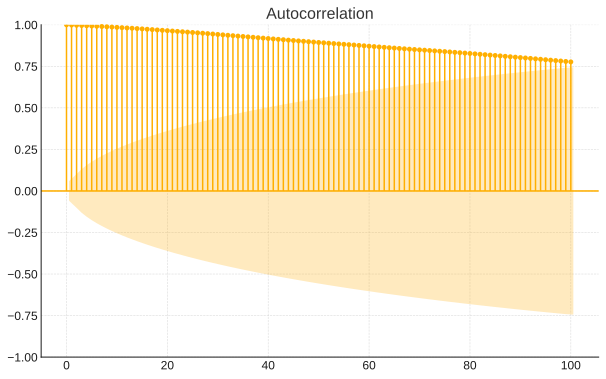

In [30]:
plot_acf(stock_residuals, lags=100, alpha=0.063)
plt.show()

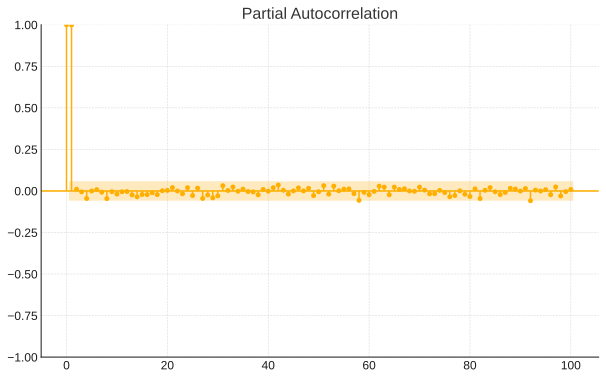

In [31]:
plot_pacf(stock_residuals, lags=100, alpha=0.063)
plt.show()

In [9]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -0.5437433594783736
p-value: 0.8831939389121154


In [12]:
# Fit MA(2) model (order 0 for AR, 1 for MA)
model_ma = ARIMA(stock_residuals, order=(0, 0, 1))
ma_fit = model_ma.fit()

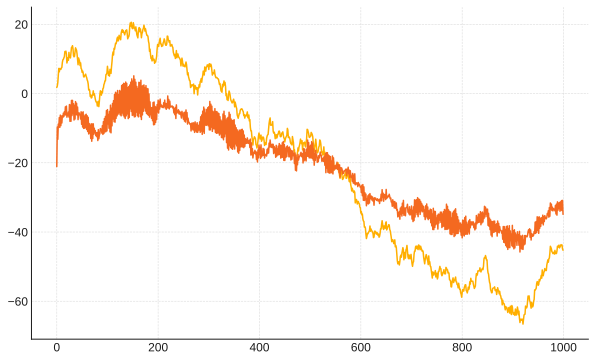

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -4037.375
Date:                Thu, 07 Nov 2024   AIC                           8080.749
Time:                        13:05:18   BIC                           8095.473
Sample:                             0   HQIC                          8086.345
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.0969      0.874    -24.141      0.000     -22.810     -19.384
ma.L1          0.9831      0.006    170.481      0.000       0.972       0.994
sigma2       187.4429     15.607     12.010      0.0

In [14]:
# Plot original data and forecast
plt.plot(stock_residuals, label="Original Data")
plt.plot(ma_fit.fittedvalues, label="MA(1) Fitted Values")
plt.show()

# Display summary
print(ma_fit.summary())

# Differencing:

In [34]:
stock_residuals_diff = stock_residuals.diff()[1:] # First value is a nan

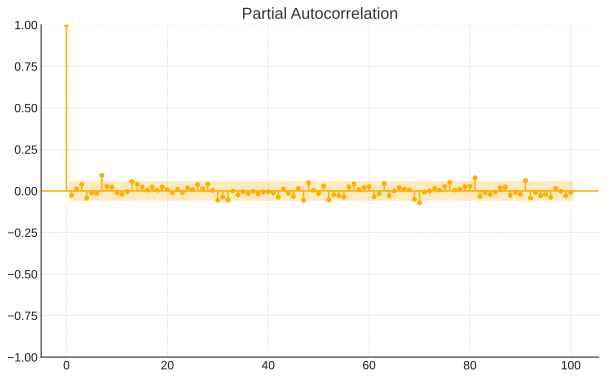

In [44]:
plot_pacf(stock_residuals_diff, lags=100, alpha=0.063)
plt.show()

In [43]:
# Perform ADF test on stationary data
adf_result = adfuller(stock_residuals_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1]) # Should be extremely small (commonly smaller than 0.05) for stationarity.

ADF Statistic: -32.424887206916196
p-value: 0.0


In [53]:
# Fit MA(2) model (order 0 for AR, 2 for I, 3 for MA)
model_ma = ARIMA(stock_residuals_diff, order=(0, 0, 3))
ma_fit = model_ma.fit()

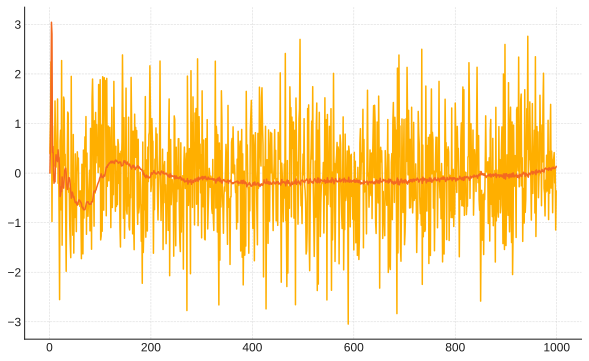

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  999
Model:                 ARIMA(0, 2, 3)   Log Likelihood               -1410.270
Date:                Thu, 07 Nov 2024   AIC                           2828.540
Time:                        13:18:41   BIC                           2848.159
Sample:                             0   HQIC                          2835.998
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.0263      0.033    -62.318      0.000      -2.090      -1.963
ma.L2          1.0549      0.063     16.776      0.000       0.932       1.178
ma.L3         -0.0285      0.032     -0.887      0.3

In [54]:
# Plot original data and forecast
plt.plot(stock_residuals_diff, label="Original Data")
plt.plot(ma_fit.fittedvalues, label="MA(3) Fitted Values")
plt.show()

# Display summary
print(ma_fit.summary())